In [ ]:
# Text Extraction From An Image And Improving The Accuracy
!pip install opencv-python pytesseract -q
!apt-get install tesseract-ocr -q

Reading package lists...
Building dependency tree...
Reading state information...
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:

import json
import cv2
import numpy as np
import pytesseract
from matplotlib import pyplot as plt
import string
from difflib import SequenceMatcher

In [ ]:
def preprocessing(image):
    print("---------------------------------------")
    print("Original Image")
    plt.imshow(image)
    plt.show()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = ((gray / 255) ** 20 * 255).astype(np.uint8)
    print("---------------------------------------")
    print("Gray Scale Image")
    plt.imshow(gray)
    plt.show()
    blur = cv2.GaussianBlur(gray, (3, 3), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    print("---------------------------------------")
    print("Thresholded Image")
    plt.imshow(thresh)
    plt.show()
    data = pytesseract.image_to_string(thresh, lang='eng', config='--psm 6')
    allowed = string.ascii_uppercase + string.ascii_lowercase + " ?"
    lines = data.split("\n")
    res = []
    for line in lines:
        t = []
        correct = 0
        for i in line:
            if i in allowed:
                t.append(i)
                correct += 1
            elif i in "1234567890":
                t.append(i)
            elif len(t) > 0 and t[-1] != " ":
                t.append(" ")
        if correct > len(line) * 3 / 5 and correct > 2:
            res.append("".join(t))
    data = "\n".join(res)
    return data

def process(image):
    a = preprocessing(image)
    return a


In [ ]:
# Path to image file
image_path = "/content/drive/MyDrive/Task3/test_image/test-7.jpg"
#image_path = "/content/drive/MyDrive/Task3/test_image/ddu_3.png"  # Update this with your image's path

# Actual text for comparison
actual_text = "TO MEME OR NOT TO MEME?\n THAT IS THE QUESTION"

# Read and process the image
img = cv2.imread(image_path)

---------------------------------------
Original Image


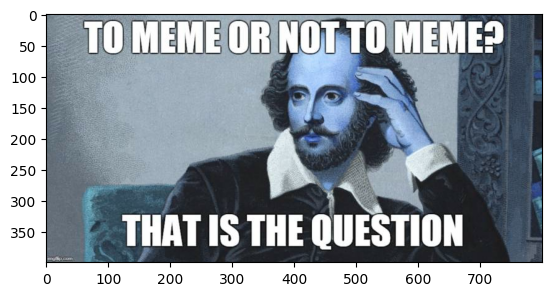

---------------------------------------
Gray Scale Image


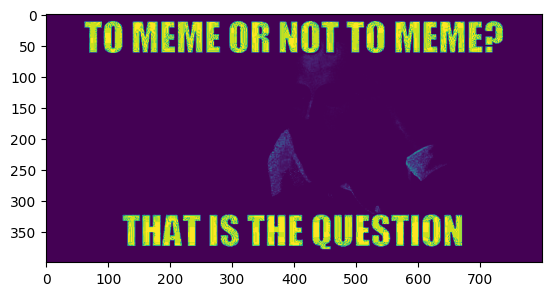

---------------------------------------
Thresholded Image


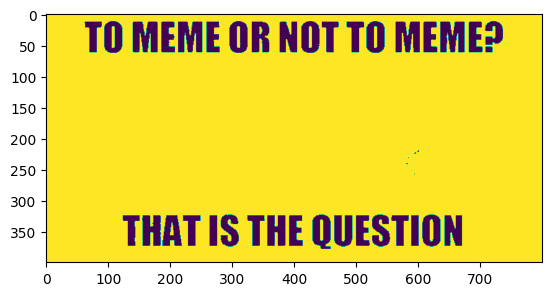

---------------------------------------
Tesseract Prediction 
__TO\MEMEOR|NOT,TO\MEME?
- rmN |
WMS si

---------------------------------------
Processed Output Text 
TO MEME OR NOT TO MEME?
THAT IS THE QUESTION


In [ ]:
processed_output = process(img)

# Tesseract prediction
tesseract_output = pytesseract.image_to_string(image_path, lang='eng', config='--psm 6')
print("---------------------------------------")
print("Tesseract Prediction \n" + tesseract_output)

# Custom processing and prediction
print("---------------------------------------")
print("Processed Output Text \n" + processed_output)

In [ ]:
# Compare the results
tesseract_ratio = SequenceMatcher(None, actual_text, tesseract_output).ratio()
processed_ratio = SequenceMatcher(None, actual_text, processed_output).ratio()

print("---------------------------------------")
print("Tesseract Accuracy Ratio = {:.2f}".format(tesseract_ratio))
print("Custom Processing Accuracy Ratio = {:.2f}".format(processed_ratio))

---------------------------------------
Tesseract Accuracy Ratio = 0.53
Custom Processing Accuracy Ratio = 0.99
